# Day 1 practice in DL

## Basic of NN with scikit- learn

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [17]:
def plot_decision_boundary(clf, X, y, ax=None, title=None):
    h = .02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolor='k')
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    if title:
        ax.set_title(title)

In [18]:
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=200, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_clusters_per_class=1, 
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

Single-layer networks:

[10] → 1 hidden layer with 10 neurons (simple architecture)

[50] → 1 hidden layer with 50 neurons (moderate complexity)

[100] → 1 hidden layer with 100 neurons (deeper representation)

Multi-layer networks:

[(]50, 30] → 2 hidden layers with 50 and 30 neurons respectively

[100, 50, 25] → 3 hidden layers with decreasing neuron counts (useful for feature refinement)

[200, 100, 50] → A deep network with gradually decreasing layer sizes

Deeper setups:

[500, 250, 100]

[10, 10, 10, 10, 10]

[1024, 512, 256, 128, 64] → Used for large-scale problems with high-dimensional data

Training:simple_na - Architecture: [10]


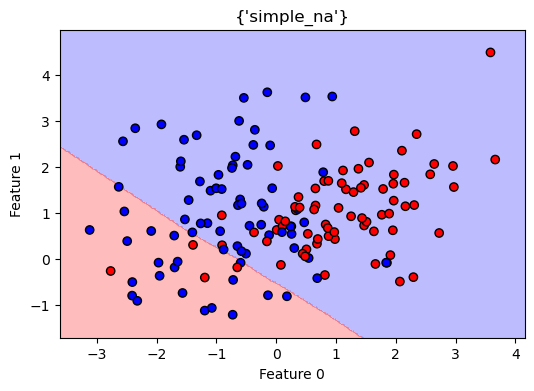

Training:moderate_na - Architecture: [50]


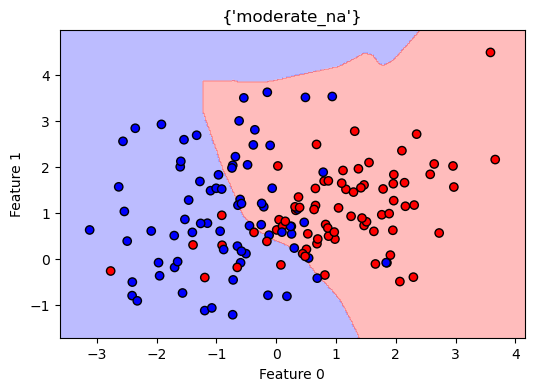

Training:deeper_na - Architecture: [100]


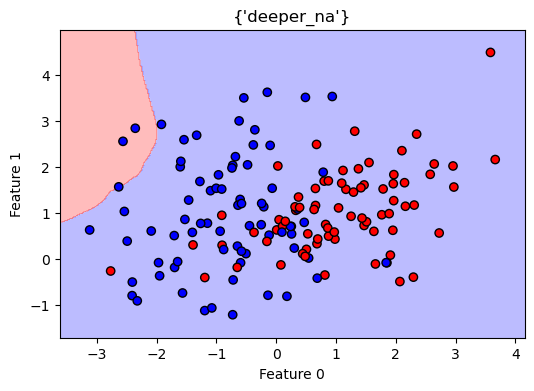

Training:2_layer - Architecture: [50, 30]


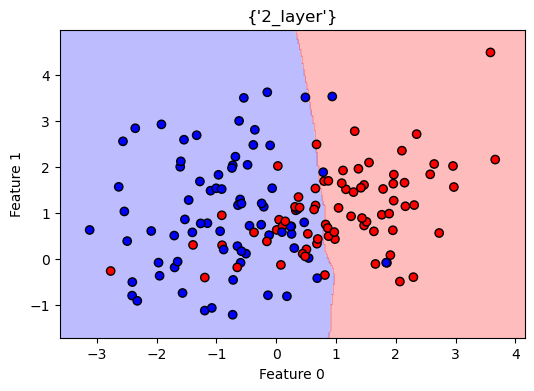

Training:3_layer - Architecture: [100, 50, 25]


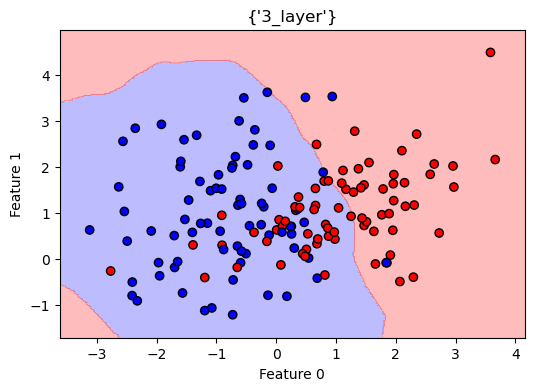

Training:3deep_layer - Architecture: [200, 100, 50]


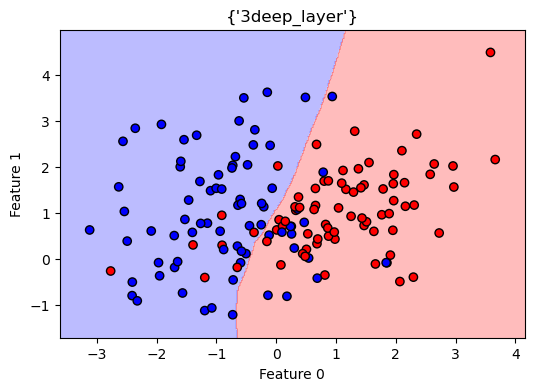

Training:31deep_layer - Architecture: [500, 250, 100]


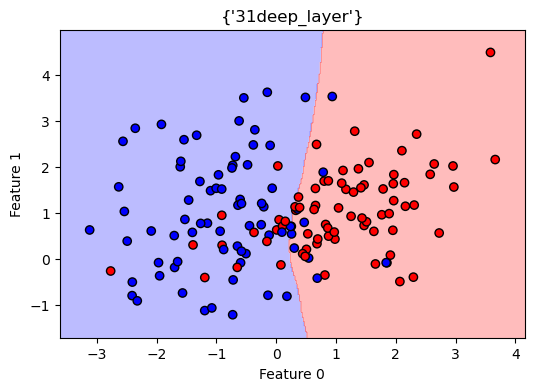

Training:5_layer - Architecture: [10, 10, 10, 10, 10]


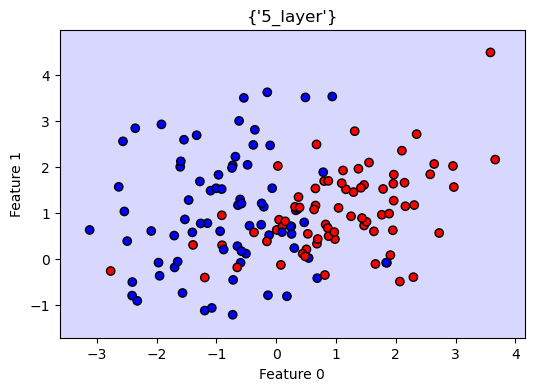

Training:5deep_layer - Architecture: [1024, 512, 256, 128, 64]


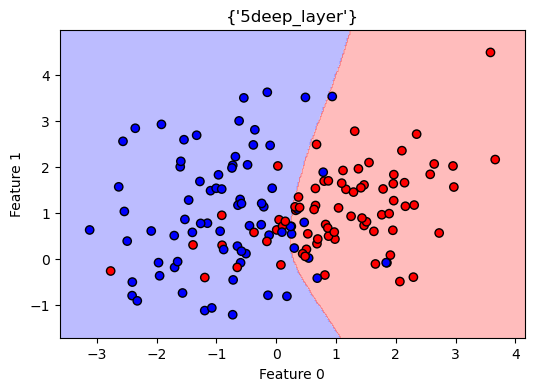

In [19]:
arch = {
    "simple_na": [10],
    "moderate_na": [50],
    "deeper_na": [100],
    "2_layer": [50, 30],
    "3_layer": [100, 50, 25],
    "3deep_layer": [200, 100, 50],
    "31deep_layer": [500, 250, 100],
    "5_layer": [10, 10, 10, 10, 10],
    "5deep_layer": [1024, 512, 256, 128, 64]
}

for i, (name, hidden_layers) in enumerate(arch.items()):
    print(f"Training:{name} - Architecture: {hidden_layers}")

    mlp = MLPClassifier (hidden_layer_sizes=hidden_layers, max_iter=1000, solver='adam', 
                         random_state=42, alpha=0.01, early_stopping=True)
    mlp.fit (X_train, y_train)
    plt.figure(figsize=(6,4))
    plot_decision_boundary( mlp, X_train, y_train, title={name})
    plt.show()

In [20]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Dict to store outputs
out_dict = {}

arch = {
    "simple_na": [10],
    "moderate_na": [50],
    "deeper_na": [100],
    "2_layer": [50, 30],
    "3_layer": [100, 50, 25],
    "3deep_layer": [200, 100, 50],
    "31deep_layer": [500, 250, 100],
    "5_layer": [10, 10, 10, 10, 10],
    "5deep_layer": [1024, 512, 256, 128, 64]
}

# Training loop
for name, hidden_layers in arch.items():
    print(f"Training: {name} - {hidden_layers}")
    
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layers,
        max_iter=1000,
        solver='adam',
        random_state=42,
        alpha=0.01,
        early_stopping=True
    )
    mlp.fit(X_train, y_train)
    
    # Save model and loss curve
    out_dict[name] = {
        'model': mlp,
        'loss_curve': mlp.loss_curve_
    }


Training: simple_na - [10]
Training: moderate_na - [50]
Training: deeper_na - [100]
Training: 2_layer - [50, 30]
Training: 3_layer - [100, 50, 25]
Training: 3deep_layer - [200, 100, 50]
Training: 31deep_layer - [500, 250, 100]
Training: 5_layer - [10, 10, 10, 10, 10]
Training: 5deep_layer - [1024, 512, 256, 128, 64]


In [21]:
arch = {
    "simple_na": [10],
    "moderate_na": [50],
    "deeper_na": [100],
    "2_layer": [50, 30],
    "3_layer": [100, 50, 25],
    "3deep_layer": [200, 100, 50],
    "31deep_layer": [500, 250, 100],
    "5_layer": [10, 10, 10, 10, 10],
    "5deep_layer": [1024, 512, 256, 128, 64]
}

out_dict[name] = {
    'model' : mlp,
    'loss_curve' : mlp.loss_curve_,
    'iterations' : mlp.n_iter_
}

for i, (name, hidden_layers) in enumerate(arch.items()):
    print(f"Training:{name} - Architecture: {hidden_layers}")

    mlp = MLPClassifier (hidden_layer_sizes=hidden_layers, max_iter=1000, solver='adam', 
                         random_state=42, alpha=0.01, early_stopping=True)
    mlp.fit (X_train, y_train)

    print(f"{name} : {mlp.n_iter_} : {mlp.loss_curve_}")
    

Training:simple_na - Architecture: [10]
simple_na : 12 : [1.2764365175283543, 1.2717928340469342, 1.267162696553019, 1.2625439185937721, 1.2579304948089358, 1.2533319958226916, 1.2487474444175342, 1.2441768536064834, 1.2396217238705054, 1.2350680389800197, 1.2305260720932556, 1.2260008017390673]
Training:moderate_na - Architecture: [50]
moderate_na : 47 : [0.7628524539678861, 0.7570847381326458, 0.7513675675714029, 0.7457136529628302, 0.7401278419773877, 0.734598510732792, 0.7291181219170955, 0.7236947264376188, 0.7183449401237391, 0.7130522312961016, 0.7078170389609015, 0.7026307818192975, 0.697474075366953, 0.6923651207961052, 0.6873093964299576, 0.6822954632397629, 0.6773267751104299, 0.6724006307892596, 0.6675222014503215, 0.6626888123681633, 0.6579050118202878, 0.6531748830989267, 0.6484991939308475, 0.6438695451344894, 0.6392925391662051, 0.6347734696725861, 0.6303002527778224, 0.6258857260985886, 0.6215341675227888, 0.6172470527440361, 0.6130216607064952, 0.6088566334516107, 0.6

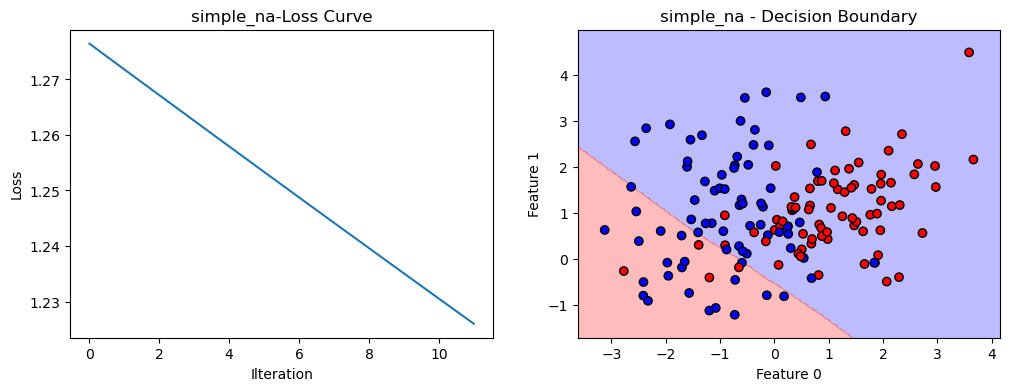

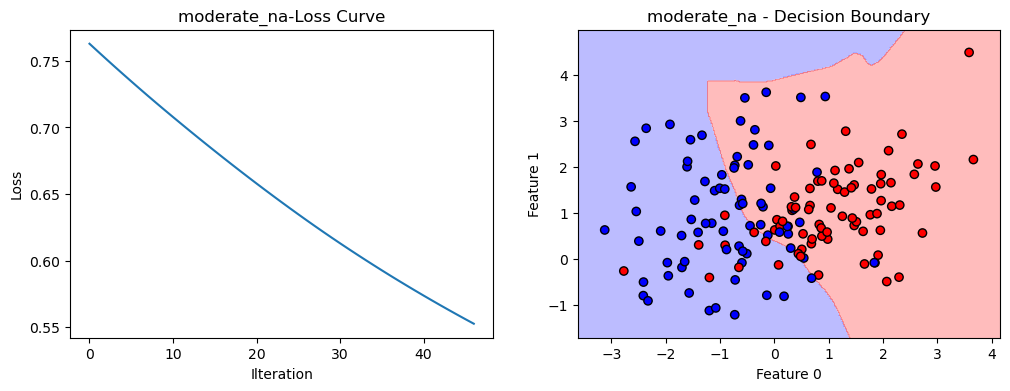

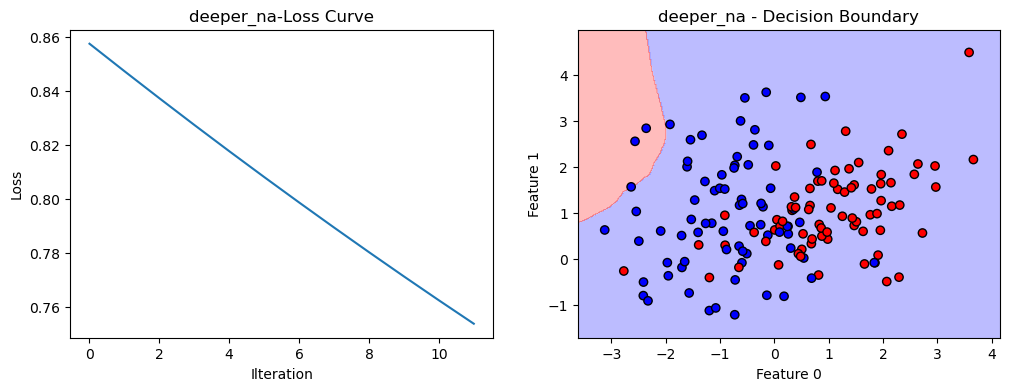

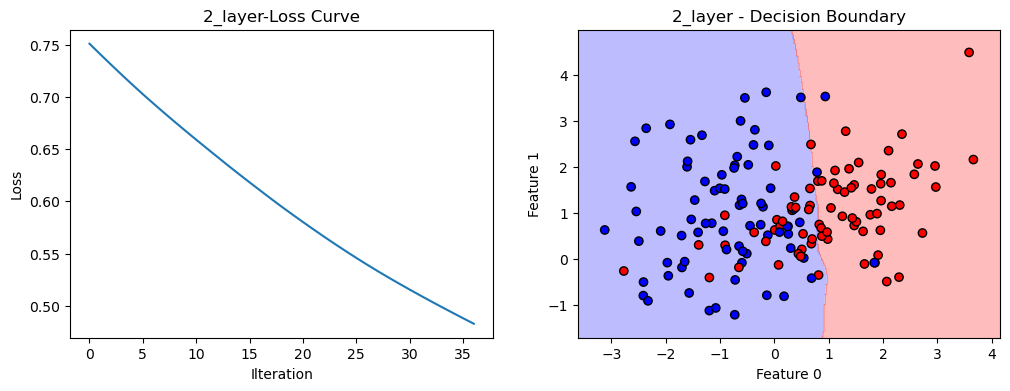

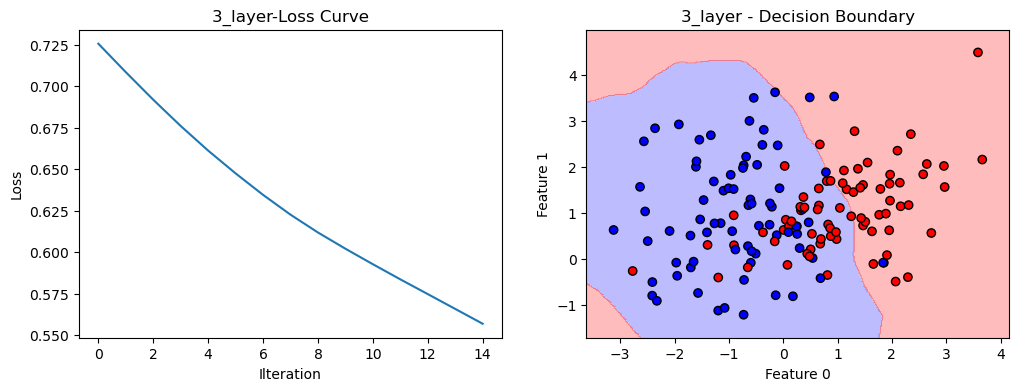

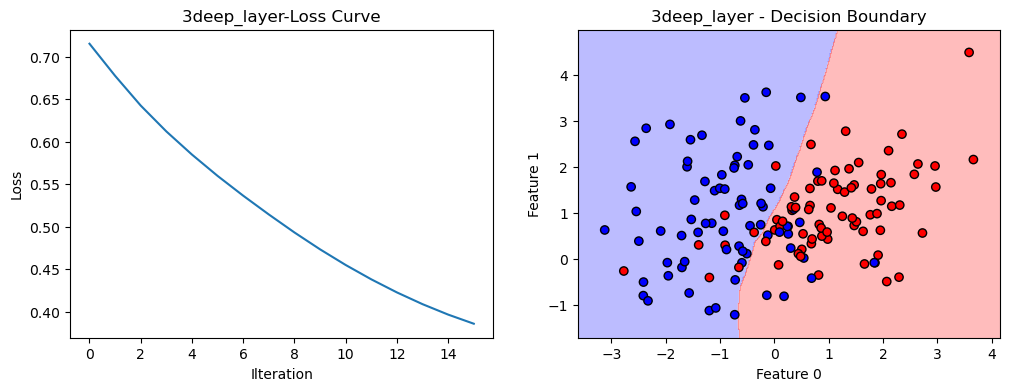

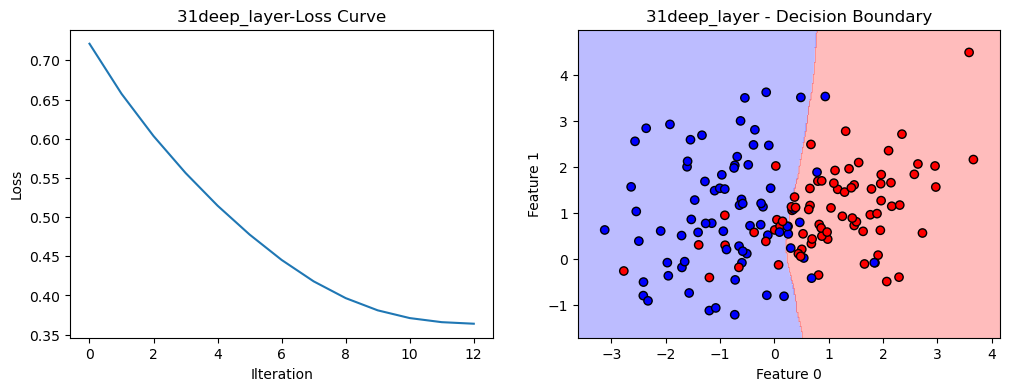

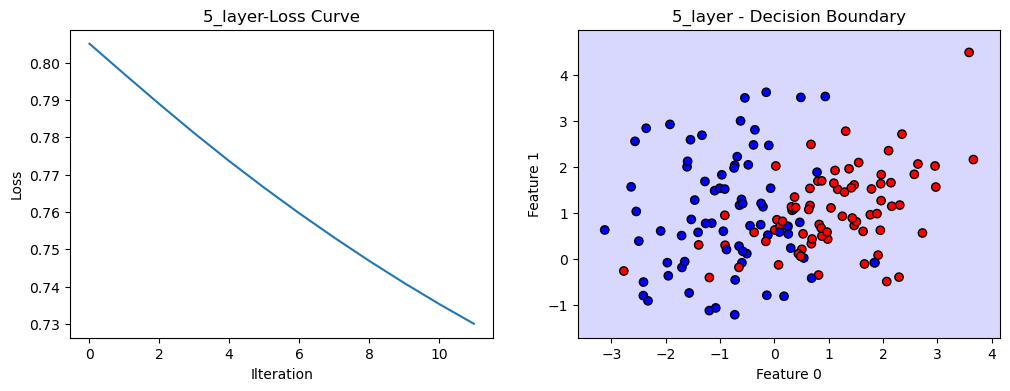

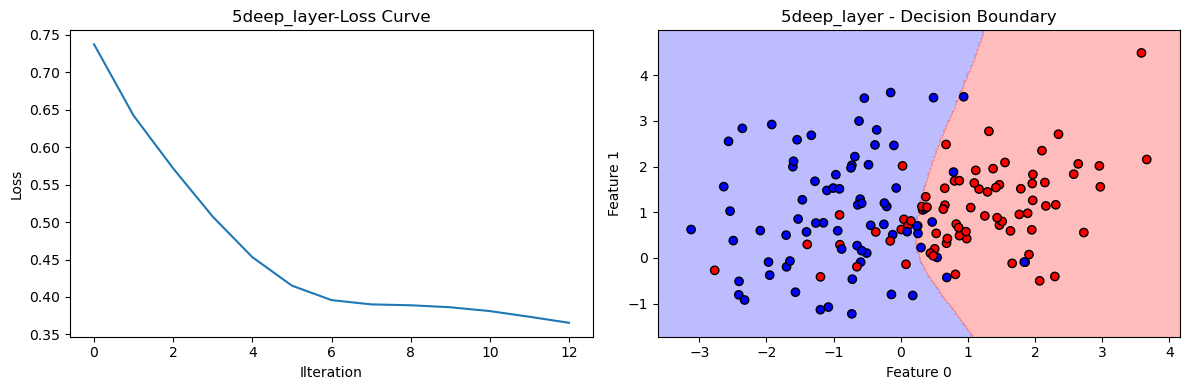

In [22]:
for i, (name, hidden_layers) in enumerate (arch.items()):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    #loss curve graph
    axs[0].plot(out_dict[name]['loss_curve'])
    axs[0].set_title(f"{name}-Loss Curve")
    axs[0].set_xlabel("Ilteration")
    axs[0].set_ylabel("Loss")

    #mlp graph
    if X_train.shape[1] == 2:
        plot_decision_boundary(out_dict[name]['model'], X_train, y_train, title=f"{name} - Decision Boundary", ax=axs[1])
    else:
        axs[1].text(0.5, 0.5, "Only for 2D inputs", ha='center', va='center')
        axs[1].set_title(f"{name} - Decision Boundary")
        axs[1].axis('off')
plt.tight_layout()
plt.show()

Train accuracy: 0.9933333333333333
Test accuracy: 0.82


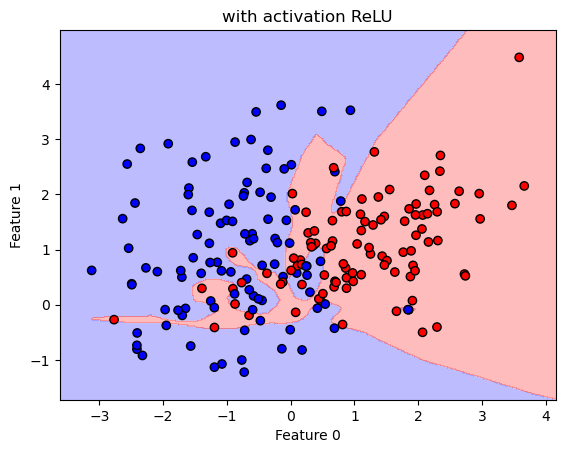

In [23]:
clf_activation = MLPClassifier(hidden_layer_sizes=(64, 64, 64, 64), 
                               activation='relu',
                               max_iter=2000, random_state=42)
clf_activation.fit(X_train, y_train)
print("Train accuracy:", clf_activation.score(X_train, y_train))
print("Test accuracy:", clf_activation.score(X_test, y_test))

plt.Figure(figsize=(8,6))
plot_decision_boundary(clf_activation, X, y, plt.gca(), title='with activation ReLU')

- Without activation functions, even deep networks behave like a linear model and cannot capture complex patterns.
- With activation functions, the network can learn non-linear decision boundaries and fit the data much better.

## NN on MNIST with scikit-learn

This code builds and compares several neural networks for classifying handwritten digits using scikit-learn's MLPClassifier. It includes data preprocessing, visualization, training, and performance comparison — all done on the MNIST dataset.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [25]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X,y = mnist['data'], mnist['target'].astype(np.int16)

In [26]:
X = X / 255.0
X.shape,  y.shape

((70000, 784), (70000,))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(f"Train sample: {X_train.shape[0]}, Test sample: {X_test.shape[0]}")

Train sample: 56000, Test sample: 14000


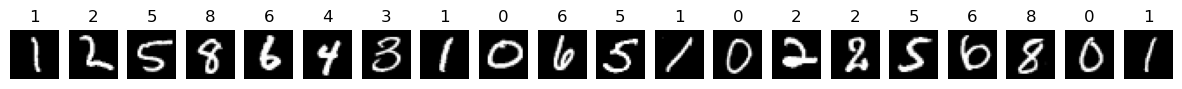

In [28]:
fig, axes = plt.subplots( 1, 20, figsize=(15,2))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(28,28), cmap='gray')
    ax.set_title(y_train[i])
    ax.axis('off')
plt.show()

In [ ]:
mlp_def = MLPClassifier(random_state=1, max_iter=400)
mlp_def.fit(X_train, y_train)

In [ ]:
y_dpre = mlp_def.predict(X_test)

In [ ]:
print("default Accuracy: ", accuracy_score(y_test, y_dpre))
print(classification_report(y_test, y_dpre))

default Accuracy:  0.9756428571428571
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1354
           1       0.99      0.98      0.98      1625
           2       0.98      0.98      0.98      1377
           3       0.97      0.96      0.97      1422
           4       0.96      0.99      0.98      1391
           5       0.97      0.96      0.97      1285
           6       0.98      0.99      0.99      1324
           7       0.97      0.97      0.97      1409
           8       0.97      0.97      0.97      1436
           9       0.98      0.96      0.97      1377

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



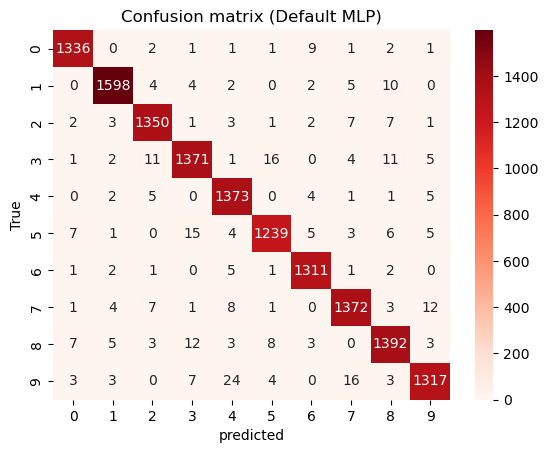

In [ ]:
cm = confusion_matrix(y_test, y_dpre)
plt.Figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('predicted')
plt.ylabel('True')
plt.title('Confusion matrix (Default MLP)')
plt.show()

Training: {'hidden_layer_sizes': (50,), 'activation': 'relu'}
Configuration: {'hidden_layer_sizes': (50,), 'activation': 'relu'} - Accuracy: 0.9706
Accuracy: 0.9706
Training: {'hidden_layer_sizes': (100,), 'activation': 'relu'}
Configuration: {'hidden_layer_sizes': (100,), 'activation': 'relu'} - Accuracy: 0.9774
Accuracy: 0.9774
Training: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh'}
Configuration: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh'} - Accuracy: 0.9701
Accuracy: 0.9701
Training: {'hidden_layer_sizes': (50, 50, 50), 'activation': 'relu'}
Configuration: {'hidden_layer_sizes': (50, 50, 50), 'activation': 'relu'} - Accuracy: 0.9680
Accuracy: 0.9680


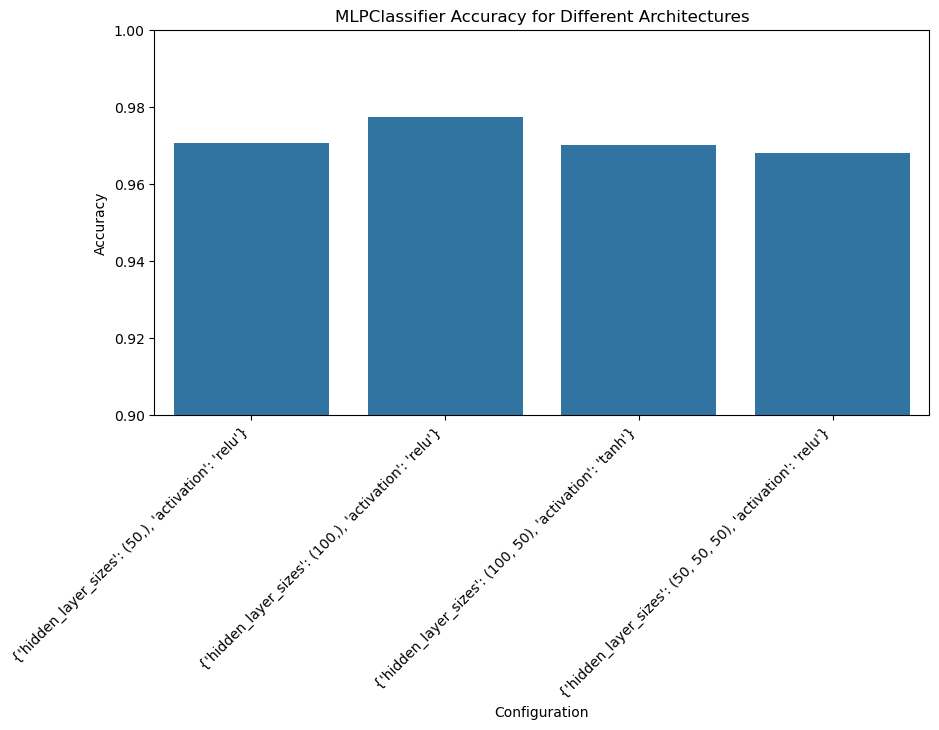

In [ ]:
# Experiment with Different NN Hyperparameter:
configs = [
    {'hidden_layer_sizes' : (50,), 'activation' : 'relu'},
    {'hidden_layer_sizes' : (100,), 'activation' : 'relu'},
    {'hidden_layer_sizes' : (100, 50), 'activation' : 'tanh'},
    {'hidden_layer_sizes' : (50, 50, 50), 'activation' : 'relu'},
]


results = []
labels = []
accuracies = []

for cfg in configs:
    print(f"Training: {cfg}")

    clf = MLPClassifier (max_iter=200, random_state=42, **cfg)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Configuration: {cfg} - Accuracy: {acc:.4f}")
    results.append({'config': cfg, 'accuracy': acc})
    print(f"Accuracy: {acc:.4f}")

    labels.append(str(cfg))
    accuracies.append(acc)

plt.figure(figsize=(10,5))
sns.barplot(x=labels, y=accuracies)
plt.ylabel('Accuracy')
plt.xlabel('Configuration')
plt.title('MLPClassifier Accuracy for Different Architectures')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.9, 1.0)
plt.show()

# Day2

## Test

In [1]:
import tensorflow as tf
print("\nTensorflow imported successfully!")
print ("Tensorflow version:", tf.__version__)


Tensorflow imported successfully!
Tensorflow version: 2.19.0


In [2]:
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU')]

In [3]:
import keras as keras
from sklearn.model_selection import train_test_split

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

C:\Users\Hibatullah\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Generate data
X = tf.random.uniform((200, 2))
y = (X + 5) * 0.3

# Convert tensors to NumPy arrays
X_np = X.numpy()
y_np = y.numpy()

# Split using scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)


In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.Input(name="InputLayer", shape=[6]),
  tf.keras.layers.Dense(100, name="Dense1"),
  tf.keras.layers.Dense(64, name="Dense2"),
  tf.keras.layers.Dense(32, name="Dense3"),
  tf.keras.layers.Dense(16, name = "Dense4"),
  tf.keras.layers.Dense(1, name="OutputLayer")

])

In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense1 (Dense)                  │ (None, 100)            │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense3 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense4 (Dense)                  │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,789 (38.24 KB)

 Trainable params: 9,789 (38.24 KB)

 Non-trainable params: 0 (0.00 B)

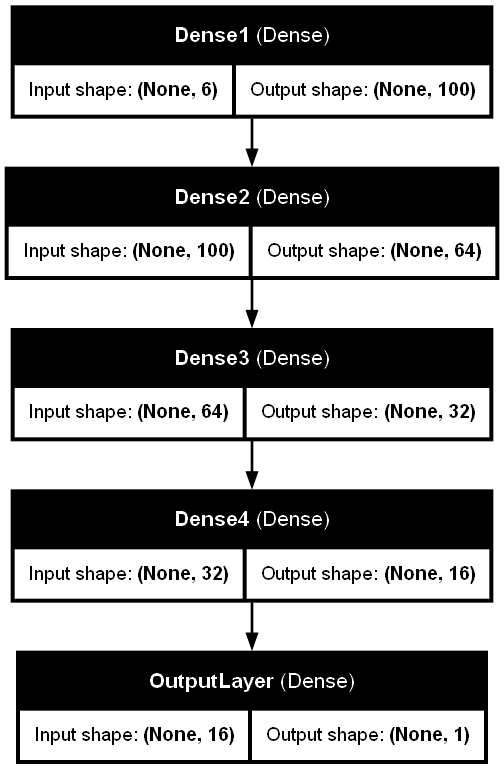

In [8]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, rankdir="TB", dpi=96)

In [9]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'accuracy'] 
)


In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Clear any previous model
tf.keras.backend.clear_session()

# Define a new model
model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),  # 2 features input
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(2)  # Output 2 values, since y_train has shape (200, 2)
])

# Compile
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'accuracy'])

# Fit
model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=10)




Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5000 - loss: 2.6707 - mae: 1.6249 - val_accuracy: 0.3750 - val_loss: 2.5578 - val_mae: 1.5889
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5021 - loss: 2.5994 - mae: 1.6023 - val_accuracy: 0.3750 - val_loss: 2.4877 - val_mae: 1.5664
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4823 - loss: 2.5174 - mae: 1.5762 - val_accuracy: 0.3750 - val_loss: 2.4335 - val_mae: 1.5480
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5198 - loss: 2.4604 - mae: 1.5567 - val_accuracy: 0.3750 - val_loss: 2.3863 - val_mae: 1.5307
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5406 - loss: 2.4042 - mae: 1.5368 - val_accuracy: 0.3750 - val_loss: 2.3364 - val_mae: 1.5114
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5031 - loss: 2.3477 - mae: 1.5157 - val_accuracy: 0.3750 - val_loss: 2.2822 - val_mae: 1.4898
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accura

## My dataset

### EDA

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras

In [6]:
df = pd.read_csv(r'C:\Users\Hibatullah\CA\DL\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df['avrage_score'] = (df['math score']+ df['reading score'] + df['writing score']) /3
df ['final score'] = df['avrage_score'].apply(lambda x:1 if x >=50 else 0)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avrage_score,final score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,0
4,male,group C,some college,standard,none,76,78,75,76.333333,1


In [8]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'avrage_score', 'final score'],
      dtype='object')

In [9]:
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course' ]
num_col = ['math score', 'reading score', 'writing score']

selected_col = cat_cols + num_col

X = df.drop(['final score','avrage_score' ], axis=1, errors='ignore')
y = df['final score']

In [10]:
print("orginal data shape:", X.shape)
print("categorical columns:", cat_cols)
print("numerical columns:", num_col)
print("features:", selected_col)

orginal data shape: (1000, 8)
categorical columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numerical columns: ['math score', 'reading score', 'writing score']
features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [11]:
X_encode = pd.get_dummies(X, columns=cat_cols, prefix=cat_cols, drop_first=False)
print("\nAfter one-hot encoding shape:", X_encode.shape)
print("Feature columns after encoding:", list(X_encode.columns))


After one-hot encoding shape: (1000, 20)
Feature columns after encoding: ['math score', 'reading score', 'writing score', 'gender_female', 'gender_male', 'race/ethnicity_group A', 'race/ethnicity_group B', 'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E', "parental level of education_associate's degree", "parental level of education_bachelor's degree", 'parental level of education_high school', "parental level of education_master's degree", 'parental level of education_some college', 'parental level of education_some high school', 'lunch_free/reduced', 'lunch_standard', 'test preparation course_completed', 'test preparation course_none']


In [12]:
scaler = StandardScaler()
X_encode[num_col] = scaler.fit_transform(X_encode[num_col])
print("\nNumerical features normalized")
print("Final preprocessed data shape:", X_encode.shape)


Numerical features normalized
Final preprocessed data shape: (1000, 20)


In [13]:

X_train, X_test, y_train, y_test = train_test_split(X_encode, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42)
print(f"\nTrain set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")



Train set shape: (600, 20)
Test set shape: (200, 20)


### Sequantial API

In [24]:
del model

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(name="InputLayer", shape=[20]),
    tf.keras.layers.Dense(264, activation='relu', name="Hidden1"),
    tf.keras.layers.Dense(200,activation='relu',  name="HiddenL2"),
    tf.keras.layers.Dense(164, activation='relu',  name="HiddenL3"),
    tf.keras.layers.Dense(64,activation='relu',  name="HiddenL4"),
     tf.keras.layers.Dense(32,activation='relu',  name="HiddenL5"),
    tf.keras.layers.Dense(1, activation='sigmoid',name="OutputLayer")
])

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden1 (Dense)                 │ (None, 264)            │         5,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenL2 (Dense)                │ (None, 200)            │        53,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenL3 (Dense)                │ (None, 164)            │        32,964 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenL4 (Dense)                │ (None, 64)             │        10,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenL5 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,181 (406.96 KB)

 Trainable params: 104,181 (406.96 KB)

 Non-trainable params: 0 (0.00 B)

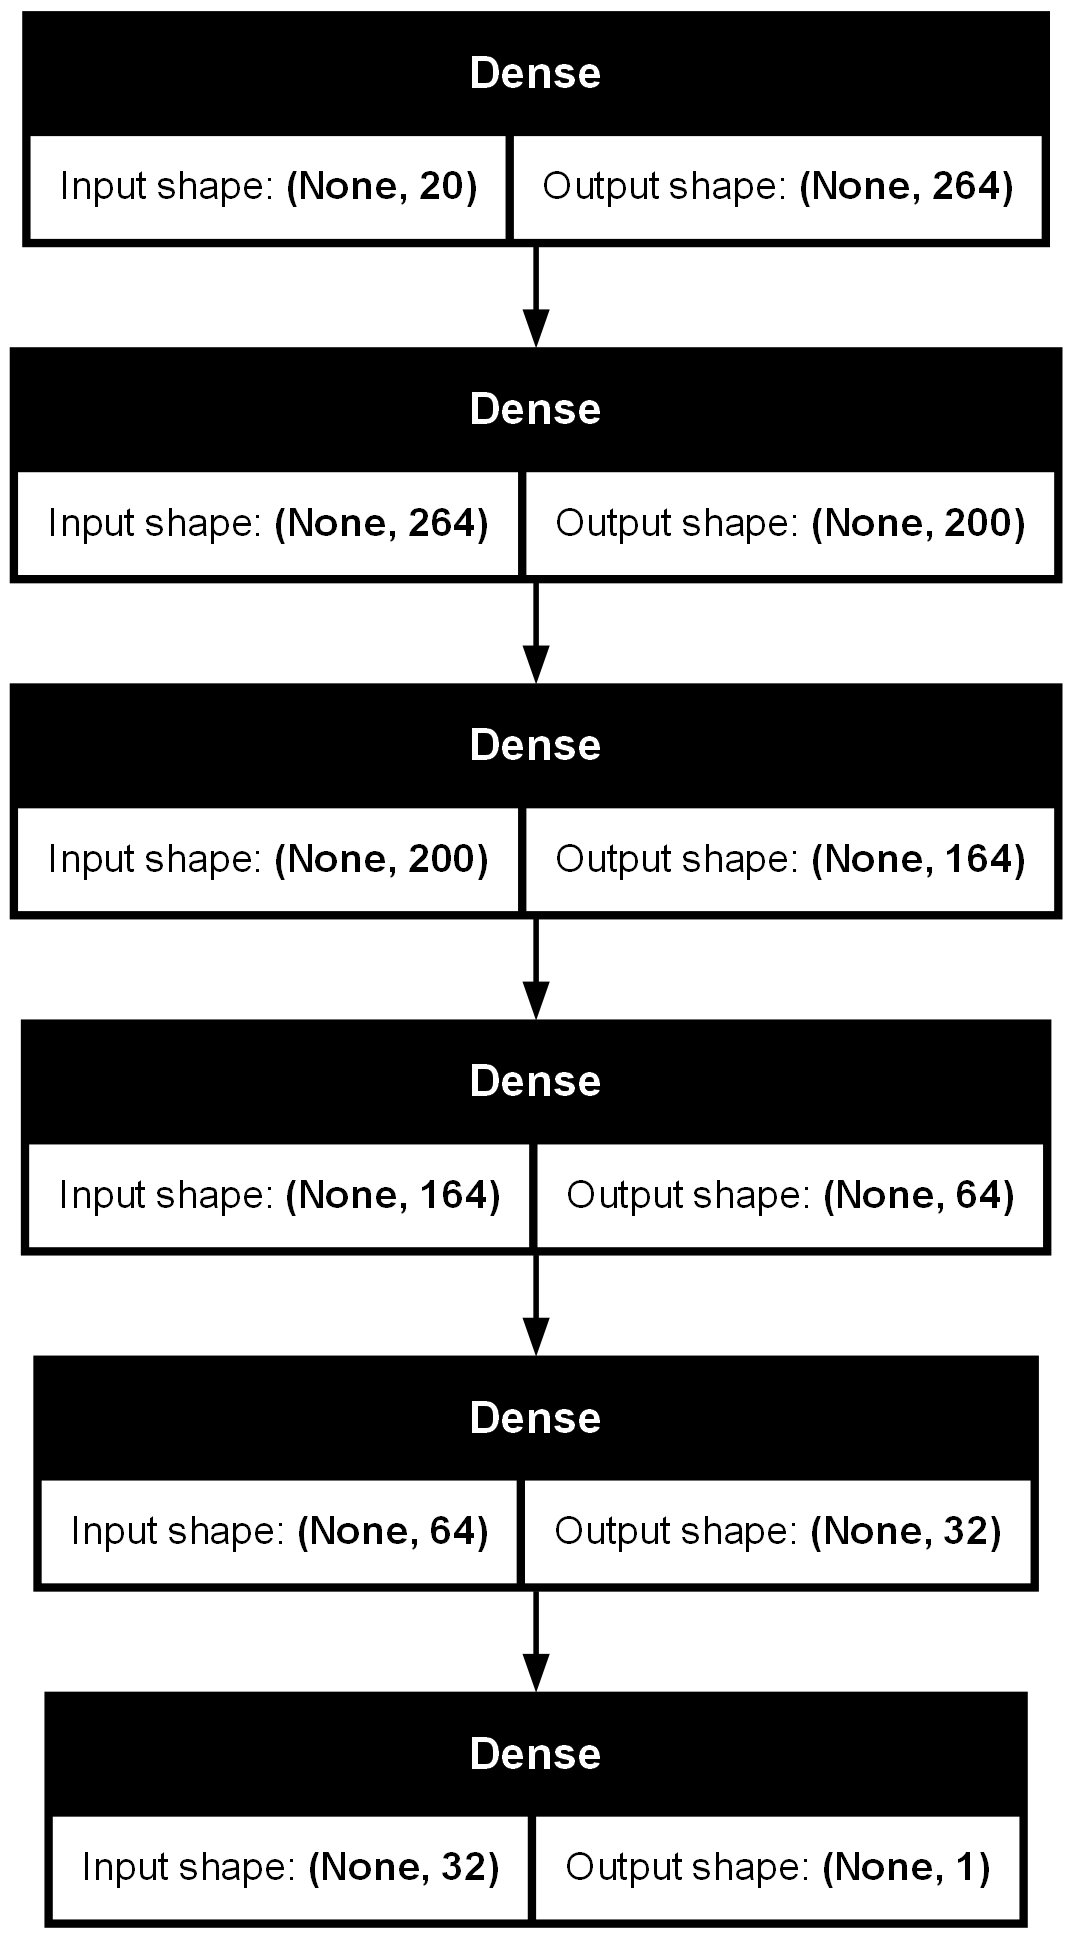

In [27]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [28]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [18]:
#del model

In [29]:
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8435 - loss: 0.1545   
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9753 - loss: 0.0199 
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9964 - loss: 0.0064 
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.0027     
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9926 - loss: 0.0072 
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9967 - loss: 0.0031     
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9975 - loss: 0.0024     
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9955 - loss: 0.0039     
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9989 - loss: 0.0021     
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9992 - loss: 0.0030 
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9996 - loss: 8.6580e-04
Epoch 12/100
19/19 ━━━━━━━━

In [22]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 9.6643e-07 - val_accuracy: 0.9900 - val_loss: 0.0063
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 6.0983e-07 - val_accuracy: 0.9900 - val_loss: 0.0063
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.0653e-06 - val_accuracy: 0.9900 - val_loss: 0.0062
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.2730e-07 - val_accuracy: 0.9900 - val_loss: 0.0063
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.1726e-07 - val_accuracy: 0.9900 - val_loss: 0.0062
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 1.0477e-06 - val_accuracy: 0.9900 - val_loss: 0.0063
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.4026e-07 - val_accuracy: 0.9900 - val_loss: 0.0063
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.8346e-07 - 

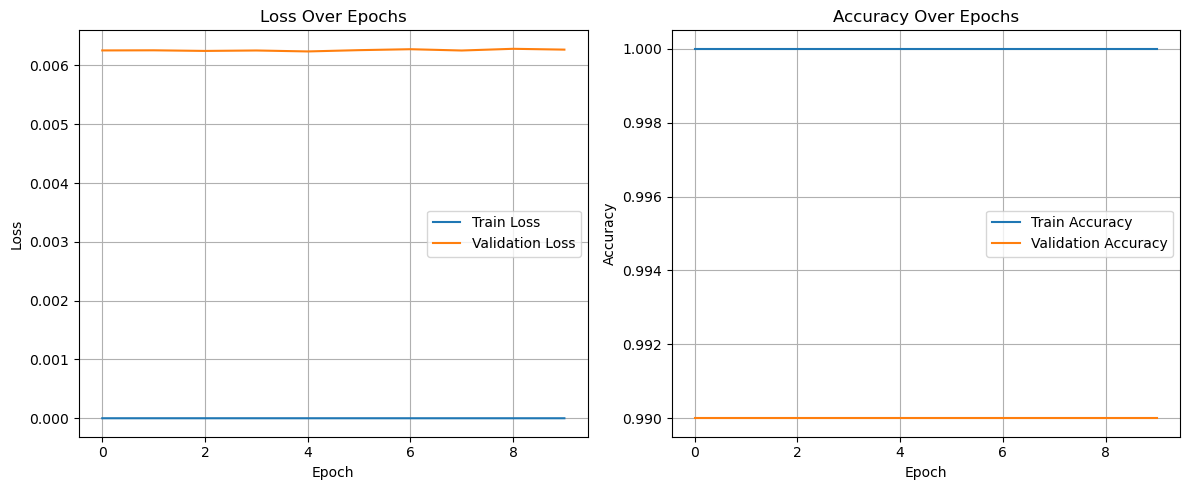

In [30]:
import matplotlib.pyplot as plt

# Create a figure with specified size
plt.figure(figsize=(12, 5))

# --- Plot Loss ---
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# --- Plot Accuracy ---
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


### Functional API

In [ ]:
#del model

In [34]:
inputs = tf.keras.Input(shape=(20,), name="InputLayer")
x = tf.keras.layers.Dense(264, activation='relu', name="Hidden1")(inputs)
x1 = tf.keras.layers.Dense(200, activation='relu', name="Hidden2")(x)
x2 = tf.keras.layers.Dense(164, activation='relu', name="Hidden3")(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name="Hidden4")(x2)
x4 = tf.keras.layers.Dense(32, activation='relu', name="Hidden5")(x3)
outputs = tf.keras.layers.Dense(1, activation='sigmoid', name="OutputLayer")(x4)

model1 = tf.keras.Model(inputs=inputs, outputs=outputs)

In [35]:
model1.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden1 (Dense)                 │ (None, 264)            │         5,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden2 (Dense)                 │ (None, 200)            │        53,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden3 (Dense)                 │ (None, 164)            │        32,964 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden4 (Dense)                 │ (None, 64)             │        10,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,181 (406.96 KB)

 Trainable params: 104,181 (406.96 KB)

 Non-trainable params: 0 (0.00 B)

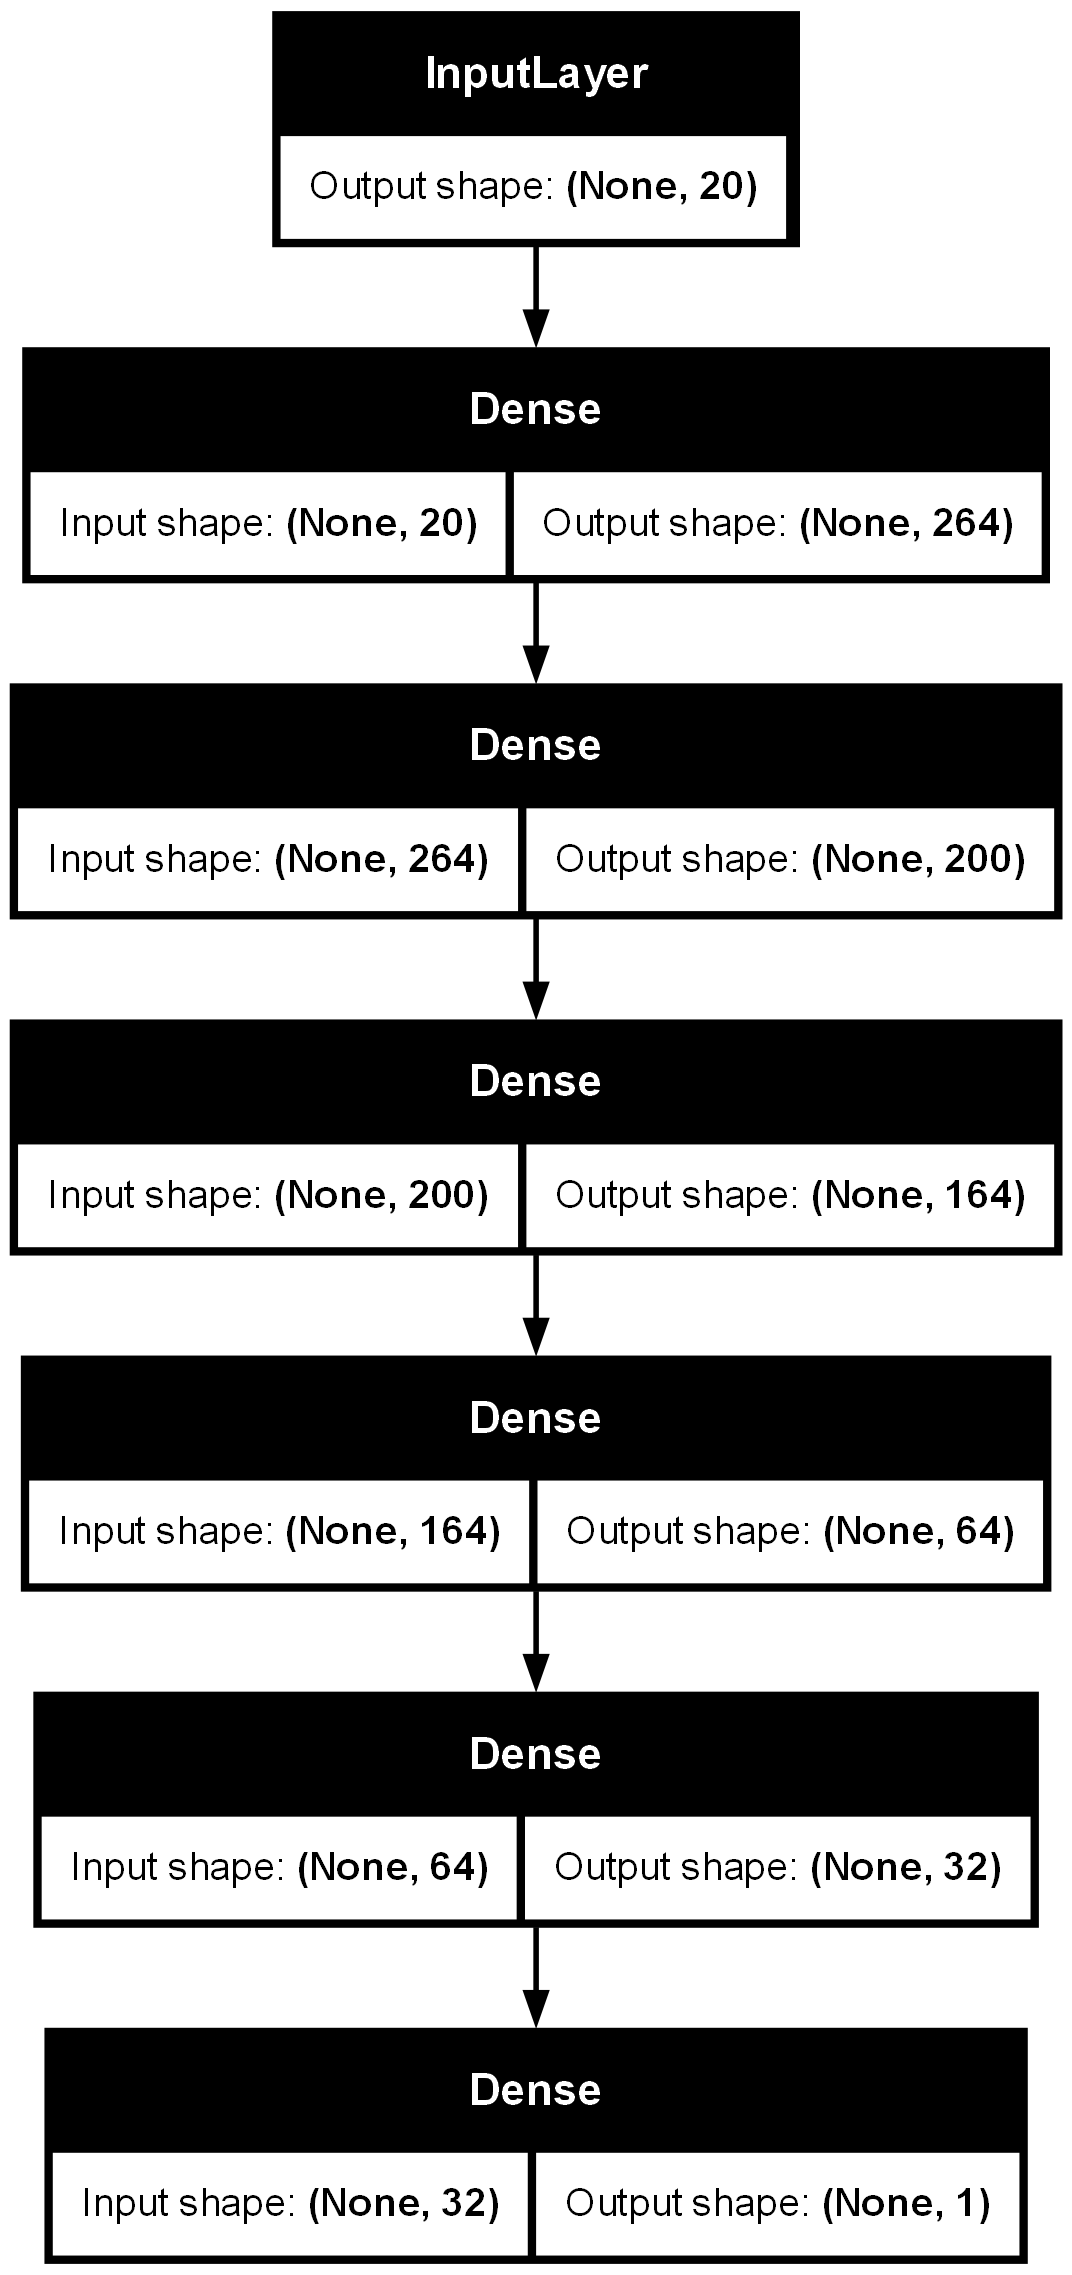

In [36]:
tf.keras.utils.plot_model(model1, show_shapes=True)

In [37]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [38]:
model1.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7896 - loss: 0.5410   
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9366 - loss: 0.1174 
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9911 - loss: 0.0455 
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9857 - loss: 0.0378 
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9949 - loss: 0.0210     
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9970 - loss: 0.0095 
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9989 - loss: 0.0049 
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9997 - loss: 0.0050 
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0042
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0011     
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0011 
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

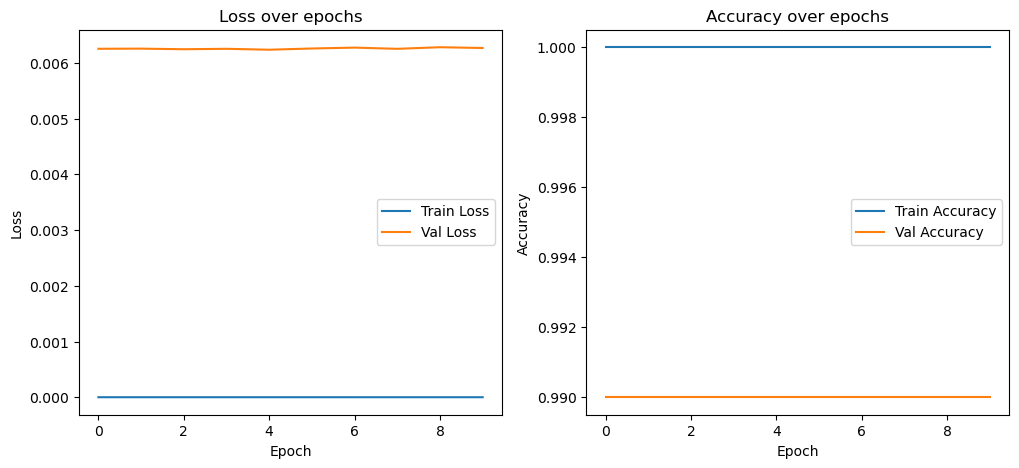

In [39]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()